# Marital Status Classification (Married vs. Unmarried)

# Import Libraries and Load Data

In [202]:
# import packages
import sklearn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(16)

In [203]:
# load data
csv_file = "~/IDC5210_Machine_Learning/Project/Translated_data/demos_w_state_trans_sample10k.csv"
demo_df = pd.read_csv(csv_file)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10321 non-null  int64  
 1   Cust_ID                  10321 non-null  int64  
 2   Cust_Segment             10321 non-null  object 
 3   Branch_ID                10321 non-null  int64  
 4   Gender                   10321 non-null  object 
 5   Marital_Status           10321 non-null  object 
 6   Education_Lv             10321 non-null  object 
 7   Job_Status               10321 non-null  object 
 8   Income                   10080 non-null  float64
 9   Age                      10321 non-null  int64  
 10  Years_w_Bank             10321 non-null  float64
 11  Work_Region              10321 non-null  object 
 12  Home_Region              10321 non-null  object 
 13  Branch_Region            10321 non-null  object 
 14  1)RISKSIZ             

In [204]:
# drop unnecessary columns
demo_df.drop(["Unnamed: 0"], axis = 1, inplace=True)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cust_ID                  10321 non-null  int64  
 1   Cust_Segment             10321 non-null  object 
 2   Branch_ID                10321 non-null  int64  
 3   Gender                   10321 non-null  object 
 4   Marital_Status           10321 non-null  object 
 5   Education_Lv             10321 non-null  object 
 6   Job_Status               10321 non-null  object 
 7   Income                   10080 non-null  float64
 8   Age                      10321 non-null  int64  
 9   Years_w_Bank             10321 non-null  float64
 10  Work_Region              10321 non-null  object 
 11  Home_Region              10321 non-null  object 
 12  Branch_Region            10321 non-null  object 
 13  1)RISKSIZ                10321 non-null  float64
 14  2)GECIKME 1-15 GUN    

In [205]:
# count risk types per row
# risk_counts = demo_df.iloc[:,10:22].apply(pd.Series.value_counts, axis=1)
# risk_counts = risk_counts.fillna(0)

In [206]:
# risk_counts

In [207]:
# demo_df = demo_df.join(risk_counts)
# demo_df

In [208]:
# demo_df.drop(['.','Penalty_201407', 'Penalty_201408', 'Penalty_201409', 
#                   'Penalty_201410', 'Penalty_201411', 'Penalty_201412', 'Penalty_201501',
#                   'Penalty_201502', 'Penalty_201503', 'Penalty_201504', 'Penalty_201505', 
#                   'Penalty_201506'], axis = 1, inplace=True)

In [209]:
# demo_df

In [210]:
csv_file2 = "~/IDC5210_Machine_Learning/Project/Translated_data/transactions(SU_ORNEKLEM_KK_HAR_BILGI).csv"
transactions = pd.read_csv(csv_file2, dtype={'Category': 'str'})
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334625 entries, 0 to 9334624
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   Cust_ID         int64  
 2   Trans_Data      object 
 3   Trans_Time      object 
 4   Trans_Amt       float64
 5   Category        object 
 6   Merchant_ID     int64  
 7   Online_Trans    int64  
 8   Trans_Type      object 
 9   Trans_Currency  object 
 10  X               float64
 11  Y               float64
dtypes: float64(3), int64(4), object(5)
memory usage: 854.6+ MB


In [211]:
trans_sub = transactions[['Cust_ID', 'Category', 'Trans_Amt', 'Online_Trans']]
trans_sub

,Cust_ID,Category,Trans_Amt,Online_Trans
0,11861396,RESTORAN,10.57,0
1,13667756,RESTORAN,82.00,0
2,11024865,RESTORAN,15.00,0
3,10922788,RESTORAN,86.00,0
4,10335987,RESTORAN,30.00,0
...,...,...,...,...
9334620,15623192,GIDA,23.50,0
9334621,16382137,TEKSTİL,115.00,0
9334622,16808133,HİZMET SEKTÖRLERİ,32.00,0
9334623,27012943,TEKSTİL,250.00,0


In [212]:
trans_sums = trans_sub.groupby(['Cust_ID', 'Category'])['Trans_Amt'].sum().reset_index()
trans_cats = trans_sums.pivot(columns='Category', index='Cust_ID', values='Trans_Amt')
trans_cats = trans_cats.fillna(0)

In [213]:
trans_cats

Category,AKARYAKIT,ALIŞVERİŞ MERKEZLERİ,ARABA KİRALAMA,AYAKKABI,BEYAZ EŞYA,"DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM",DOĞRUDAN PAZARLAMA-MAIL ORDER,DİĞER,EĞLENCE VE SPOR,EĞİTİM,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1560993,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0
1566513,2170.00,20.05,0.0,0.00,250.0,0.0,0.0,268.50,0.0,0.0,...,0.00,0.00,0.0,858.00,0.0,2238.76,0.00,1375.0,1928.13,0.0
1567711,375.32,0.00,0.0,558.40,55.0,0.0,0.0,350.92,0.0,0.0,...,716.87,89.90,0.0,465.39,0.0,77.57,5587.22,912.6,64.93,70.0
1569761,0.00,0.00,0.0,459.87,0.0,0.0,0.0,0.00,0.0,0.0,...,1590.00,59.99,0.0,0.00,0.0,8797.33,1319.34,0.0,3026.21,0.0
1569938,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,379.00,19.90,840.0,74.85,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28196275,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,55.25,0.00,0.0,0.00,0.0
28196280,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,229.90,0.0
28200516,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,5338.26,0.00,0.0,0.00,0.0


In [214]:
demo_df = demo_df.join(trans_cats, on='Cust_ID')

In [215]:
demo_df.drop('Cust_ID', axis = 1, inplace = True)

In [216]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 66 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Cust_Segment                            10321 non-null  object 
 1   Branch_ID                               10321 non-null  int64  
 2   Gender                                  10321 non-null  object 
 3   Marital_Status                          10321 non-null  object 
 4   Education_Lv                            10321 non-null  object 
 5   Job_Status                              10321 non-null  object 
 6   Income                                  10080 non-null  float64
 7   Age                                     10321 non-null  int64  
 8   Years_w_Bank                            10321 non-null  float64
 9   Work_Region                             10321 non-null  object 
 10  Home_Region                             10321 non-null  ob

# Data Exploration

In [217]:
demo_df['Cust_Segment'].value_counts()

BİREYSEL                       9598
BİREBİR                         400
MİKRO                           298
EXI26                            16
ÖZEL BANKACILIK MÜŞTERİLERİ       9
Name: Cust_Segment, dtype: int64

In [218]:
demo_df['Marital_Status'].value_counts()

EVLİ          6563
BEKAR         3104
BOŞANMIŞ       473
BİLINMİYOR     143
DUL             38
Name: Marital_Status, dtype: int64

In [219]:
demo_df['Education_Lv'].value_counts()

HS_below      6440
University    3489
Graduate       385
BİLİNMİYOR       7
Name: Education_Lv, dtype: int64

In [220]:
demo_df['Job_Status'].value_counts()

ÜCRETLİ (ÖZEL)                    7812
SERBEST MESLEK                    1123
ÜCRETLI (KAMU)                     550
EMEKLİ                             322
ÇALIŞAN EMEKLİ(ÜCRETLİ)            202
EV HANIMI                           82
ÇALIŞMIYOR                          76
ÇALIŞAN EMEKLİ(SERBEST MESLEK)      65
DİĞER                               37
TANIMSIZ                            29
ÖĞRENCİ                             21
YURTDIŞINDA ÇALIŞAN                  2
Name: Job_Status, dtype: int64

In [221]:
demo_df['Home_Region'].value_counts()

MARMARA             10062
BLACK SEA              70
MEDITERRANEAN          52
AEGEAN                 41
CENTRAL ANATOLIA       40
EASTERN ANATOLIA       35
SE ANATOLIA            21
Name: Home_Region, dtype: int64

In [222]:
demo_df['Work_Region'].value_counts()

MARMARA             10199
AEGEAN                 29
CENTRAL ANATOLIA       29
BLACK SEA              24
MEDITERRANEAN          20
EASTERN ANATOLIA       10
SE ANATOLIA            10
Name: Work_Region, dtype: int64

In [223]:
demo_df['Branch_Region'].value_counts()

MARMARA             9869
BLACK SEA            109
CENTRAL ANATOLIA     107
AEGEAN               100
MEDITERRANEAN         68
EASTERN ANATOLIA      37
SE ANATOLIA           31
Name: Branch_Region, dtype: int64

In [224]:
# check values for nulls
demo_df.isnull().sum(axis = 0)

Cust_Segment                         0
Branch_ID                            0
Gender                               0
Marital_Status                       0
Education_Lv                         0
                                  ... 
TEKNOLOJİ                          116
TEKSTİL                            116
TELEKOMÜNİKASYON                   116
YAPI MALZ., HIRDAVAT, NALBURİYE    116
İÇKİLİ YERLER - KUMARHANE          116
Length: 66, dtype: int64

In [225]:
demo_df[demo_df['DİĞER'].isnull()]
#looks like these customers didn't have transaction data or did not use their credit cards

,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,Work_Region,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
21,BİREYSEL,16,E,EVLİ,HS_below,ÜCRETLİ (ÖZEL),2000.0,44,9.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,BİREYSEL,1168,E,BEKAR,HS_below,ÜCRETLİ (ÖZEL),1200.0,25,3.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,BİREYSEL,728,E,EVLİ,HS_below,SERBEST MESLEK,13311.0,44,11.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,BİREYSEL,571,E,BEKAR,HS_below,ÜCRETLİ (ÖZEL),1500.0,25,1.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,BİREYSEL,1343,E,EVLİ,HS_below,ÇALIŞAN EMEKLİ(ÜCRETLİ),2422.0,51,3.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,BİREYSEL,692,K,EVLİ,University,ÜCRETLİ (ÖZEL),0.0,35,13.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9876,BİREYSEL,766,K,BEKAR,Graduate,ÜCRETLİ (ÖZEL),0.0,47,7.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9964,BİREYSEL,392,K,BOŞANMIŞ,HS_below,ÜCRETLİ (ÖZEL),3000.0,45,8.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10127,BİREYSEL,161,E,BEKAR,HS_below,ÜCRETLİ (ÖZEL),1100.0,27,3.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
#demo_df.dropna(subset=["AKARYAKIT"], inplace=True)
demo_df.dropna(subset=["Home_Region"], inplace=True)
demo_df.dropna(subset=["Branch_Region"], inplace=True)
demo_df.dropna(subset=["transaction_gas_mean"], inplace=True)
demo_df.dropna(subset=["transaction_gas_max"], inplace=True)

In [227]:
demo_df.drop(['transaction_health_mean', 'transaction_health_max', 'transaction_food_mean', 'transaction_food_max'], axis = 1, inplace=True)

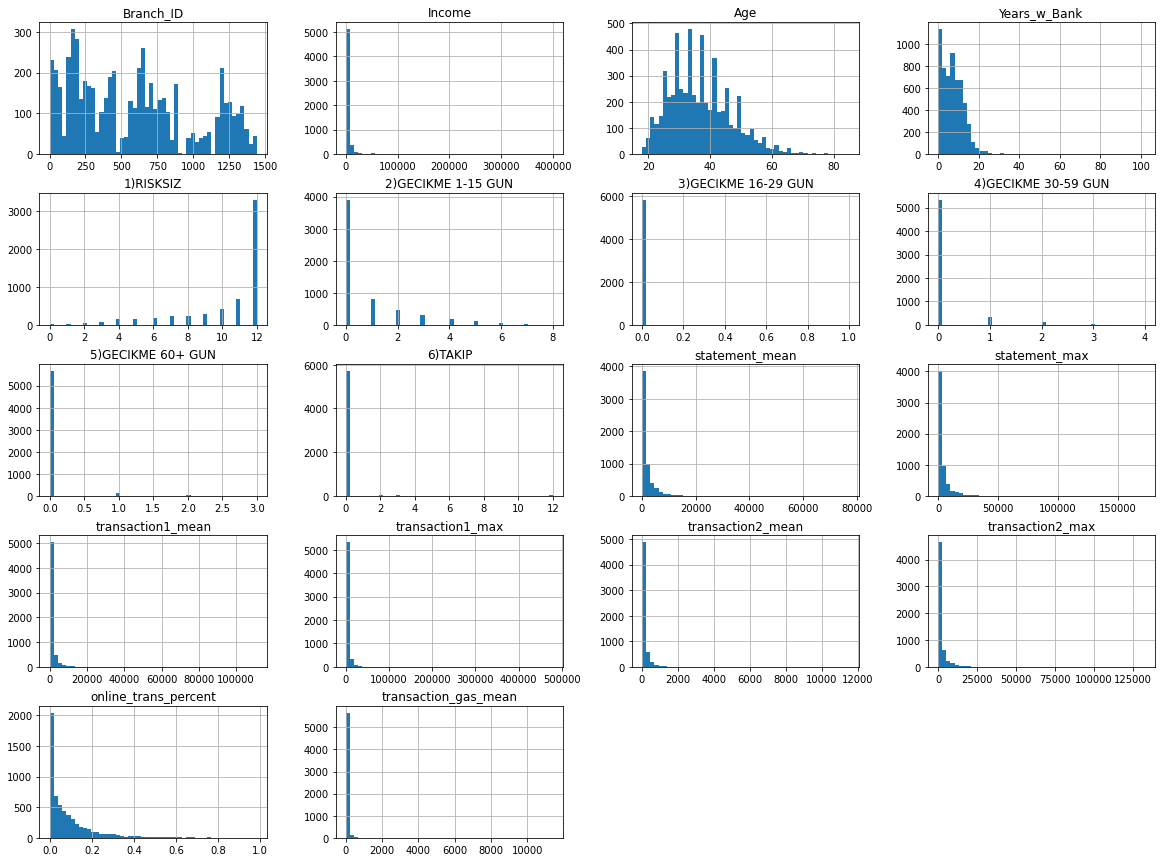

In [228]:
# Data Exploration
%matplotlib inline
import matplotlib.pyplot as plt
demo_df.iloc[:,0:26].hist(bins=50, figsize=(20,15))
plt.show()

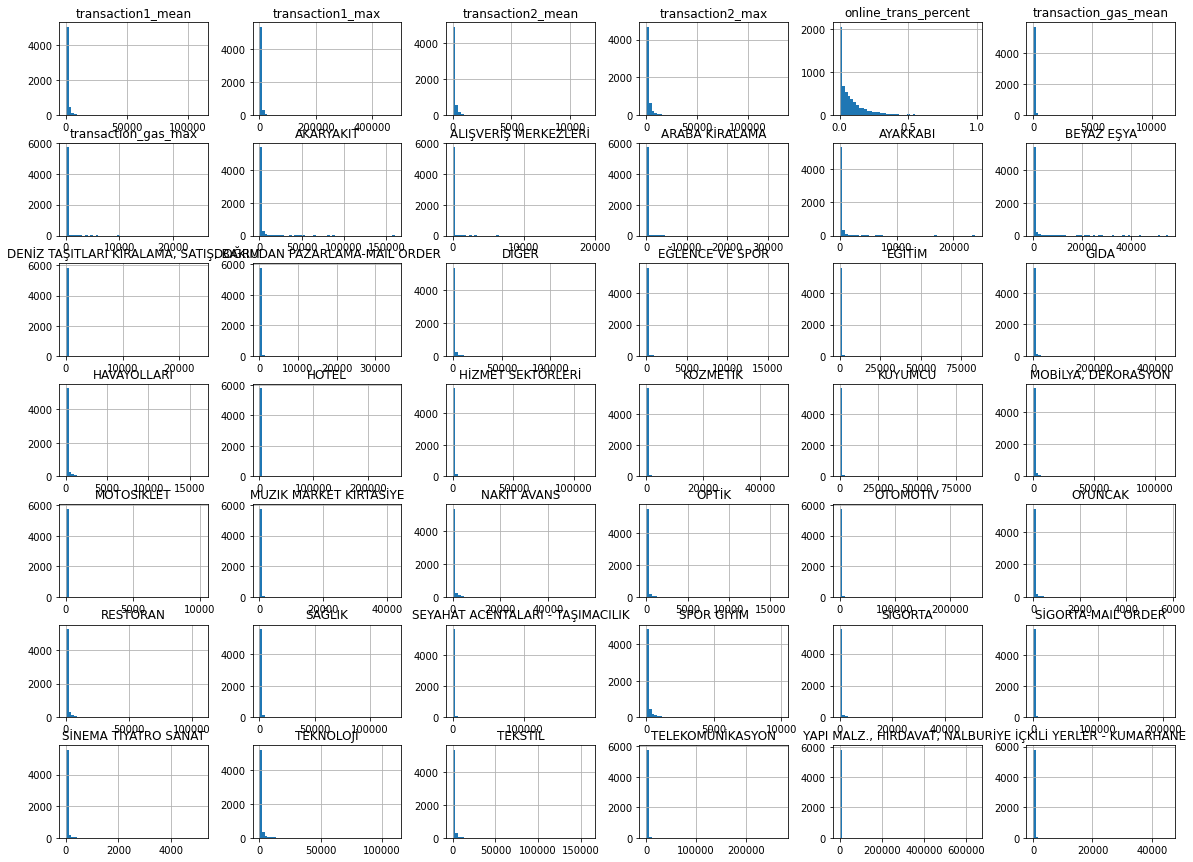

In [229]:
demo_df.iloc[:,20:].hist(bins=50, figsize=(20,15))
plt.show()

In [230]:
demo_df.columns.values

array(['Cust_Segment', 'Branch_ID', 'Gender', 'Marital_Status',
       'Education_Lv', 'Job_Status', 'Income', 'Age', 'Years_w_Bank',
       'Work_Region', 'Home_Region', 'Branch_Region', '1)RISKSIZ',
       '2)GECIKME 1-15 GUN', '3)GECIKME 16-29 GUN', '4)GECIKME 30-59 GUN',
       '5)GECIKME 60+ GUN', '6)TAKIP', 'statement_mean', 'statement_max',
       'transaction1_mean', 'transaction1_max', 'transaction2_mean',
       'transaction2_max', 'online_trans_percent', 'transaction_gas_mean',
       'transaction_gas_max', 'AKARYAKIT', 'ALIŞVERİŞ MERKEZLERİ',
       'ARABA KİRALAMA', 'AYAKKABI', 'BEYAZ EŞYA',
       'DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM',
       'DOĞRUDAN PAZARLAMA-MAIL ORDER', 'DİĞER', 'EĞLENCE VE SPOR',
       'EĞİTİM', 'GIDA', 'HAVAYOLLARI', 'HOTEL', 'HİZMET SEKTÖRLERİ',
       'KOZMETİK', 'KUYUMCU', 'MOBİLYA, DEKORASYON', 'MOTOSİKLET',
       'MUZIK MARKET KIRTASİYE', 'NAKİT AVANS', 'OPTİK', 'OTOMOTİV',
       'OYUNCAK', 'RESTORAN', 'SAĞLIK',
       'SEYAHAT ACENTALAR

# Data Processing

In [231]:
#train/test split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(demo_df, test_size = 0.2, random_state = 16)

In [232]:
# separate labels from feature matrix
train_y = train_set['Marital_Status']
train_X = train_set.drop('Marital_Status', axis = 1)
test_y = test_set['Marital_Status']
test_X = test_set.drop('Marital_Status', axis = 1)

In [233]:
#pipeline

# locations, gender, marital status, education level, job status, penalties
# Additional processing with full data set: drop home region branch region nulls

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler())
])

In [234]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline  = Pipeline([
('cat_encoder', OneHotEncoder())
])

In [235]:
from sklearn.compose import ColumnTransformer
num_attribs = ['Branch_ID', 'Income', 'Age', 'Years_w_Bank', '1)RISKSIZ',
       '2)GECIKME 1-15 GUN', '3)GECIKME 16-29 GUN', '4)GECIKME 30-59 GUN',
       '5)GECIKME 60+ GUN', '6)TAKIP', 'statement_mean', 'statement_max',
       'transaction1_mean', 'transaction1_max', 'transaction2_mean',
       'transaction2_max', 'online_trans_percent',
       'transaction_gas_mean', 'transaction_gas_max', 'AKARYAKIT',
       'ALIŞVERİŞ MERKEZLERİ', 'ARABA KİRALAMA', 'AYAKKABI', 'BEYAZ EŞYA',
       'DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM',
       'DOĞRUDAN PAZARLAMA-MAIL ORDER', 'DİĞER', 'EĞLENCE VE SPOR',
       'EĞİTİM', 'GIDA', 'HAVAYOLLARI', 'HOTEL', 'HİZMET SEKTÖRLERİ',
       'KOZMETİK', 'KUYUMCU', 'MOBİLYA, DEKORASYON', 'MOTOSİKLET',
       'MUZIK MARKET KIRTASİYE', 'NAKİT AVANS', 'OPTİK', 'OTOMOTİV',
       'OYUNCAK', 'RESTORAN', 'SAĞLIK',
       'SEYAHAT ACENTALARI - TAŞIMACILIK', 'SPOR GİYİM', 'SİGORTA',
       'SİGORTA-MAIL ORDER', 'SİNEMA TİYATRO SANAT', 'TEKNOLOJİ',
       'TEKSTİL', 'TELEKOMÜNİKASYON', 'YAPI MALZ., HIRDAVAT, NALBURİYE',
       'İÇKİLİ YERLER - KUMARHANE']
cat_attribs = ['Cust_Segment', 'Gender', 'Education_Lv', 'Job_Status', 'Work_Region', 'Home_Region', 'Branch_Region']

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs), 
], remainder = 'passthrough')

In [236]:
train_X_prepared = full_pipeline.fit_transform(train_X)

In [237]:
train_y_md = (train_y == 'EVLİ')
test_y_md = (test_y == 'EVLİ')

In [238]:
train_X[train_X.isnull()]

,Cust_Segment,Branch_ID,Gender,Education_Lv,Job_Status,Income,Age,Years_w_Bank,Work_Region,Home_Region,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dimensionality Reduction

In [239]:
#pca
from sklearn.decomposition import TruncatedSVD

TruncSVD = TruncatedSVD(n_components = 63)
TruncSVD.fit(train_X_prepared)
cumsum = np.cumsum(TruncSVD.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

In [173]:
d

41

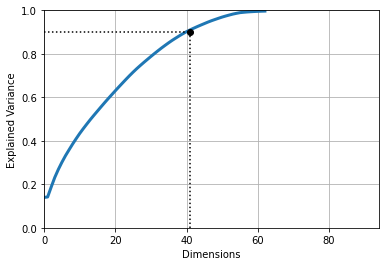

In [174]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 94, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.90], "k:")
plt.plot([0, d], [0.90, 0.90], "k:")
plt.plot(d, 0.90, "ko")

plt.grid(True)
# save_fig("explained_variance_plot")
plt.show()

# try 8 dimensions

In [175]:
TruncSVD = TruncatedSVD(n_components=41)
X_reduced = TruncSVD.fit_transform(train_X_prepared)

# Train Model

## Bagging Classifier

### Randomized Search

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

param_distribs = {
        'base_estimator__max_depth': randint(low=1, high=10),
        'base_estimator__max_features': randint(low=1, high=10),
        'n_estimators': randint(low=100, high=300)
    }

dt_classif = DecisionTreeClassifier() 

bag_classif = BaggingClassifier(base_estimator = dt_classif)
rnd_search_cv = RandomizedSearchCV(bag_classif, param_distributions=param_distribs,
                                n_iter=20, cv=3, scoring='accuracy', random_state=16)
rnd_search_cv.fit(X_reduced, train_y_md)

RandomizedSearchCV(cv=3,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
                   n_iter=20,
                   param_distributions={'base_estimator__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a5fddc7f0>,
                                        'base_estimator__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a5fddcfd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a5de78550>},
                   random_state=16, scoring='accuracy')

In [177]:
rnd_search_cv.best_params_

{'base_estimator__max_depth': 8,
 'base_estimator__max_features': 6,
 'n_estimators': 115}

### Training

#### All Dimensions

In [178]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth=9, max_features=6), n_estimators=118,
    max_samples=100, bootstrap=True, n_jobs=-1,
    oob_score=True)

bag_clf.fit(train_X_prepared, train_y_md)

bag_clf.oob_score_

0.747701518067137

In [179]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(bag_clf, train_X_prepared, train_y_md, cv = 3)

In [180]:
from sklearn.metrics import accuracy_score

accuracy_score(train_y_md, y_train_pred)

0.7586059439811845

In [181]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y_md, y_train_pred)

array([[ 511, 1027],
       [ 102, 3037]])

#### Reduced Dimensions

In [182]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth=9, max_features=6), n_estimators=118,
    max_samples=100, bootstrap=True, n_jobs=-1,
    oob_score=True)

bag_clf.fit(X_reduced, train_y_md)

bag_clf.oob_score_

0.7609578789822535

In [183]:
y_train_pred = cross_val_predict(bag_clf, X_reduced, train_y_md, cv = 3)

accuracy_score(train_y_md, y_train_pred)

0.7575368826170622

In [184]:
confusion_matrix(train_y_md, y_train_pred)

array([[ 649,  889],
       [ 245, 2894]])

## AdaBoost

### Random Search

In [185]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import AdaBoostClassifier

param_distribs = {
        'base_estimator__max_depth': randint(low=1, high=10),
        'base_estimator__max_features': randint(low=1, high=10),
        'n_estimators': randint(low=100, high=500),
        'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
    }

dt_classif = DecisionTreeClassifier() 

ada_classif = AdaBoostClassifier(base_estimator = dt_classif, algorithm="SAMME.R")
rnd_search = RandomizedSearchCV(ada_classif, param_distributions=param_distribs,
                                n_iter=20, cv=3, scoring='accuracy', random_state=16)
rnd_search.fit(X_reduced, train_y_md)

RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   n_iter=20,
                   param_distributions={'base_estimator__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a4a622790>,
                                        'base_estimator__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a4368e1c0>,
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a5e412ac0>},
                   random_state=16, scoring='accuracy')

In [186]:
rnd_search.best_params_

{'base_estimator__max_depth': 8,
 'base_estimator__max_features': 6,
 'learning_rate': 0.1,
 'n_estimators': 372}

### Training

In [187]:
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=7, max_features=2), n_estimators=413,
algorithm="SAMME.R", learning_rate=0.5)

ada_clf.fit(X_reduced, train_y_md)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                         max_features=2),
                   learning_rate=0.5, n_estimators=413)

In [188]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(ada_clf, X_reduced, train_y_md, cv = 3)

In [189]:
confusion_matrix(train_y_md, y_train_pred)

array([[ 706,  832],
       [ 307, 2832]])

In [190]:
accuracy_score(train_y_md, y_train_pred)

0.7564678212529399

## Gradient Boost

### Random Search

In [191]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint

param_distribs = {
        'max_depth': randint(low=1, high=10),
        'max_features': randint(low=1, high=10),
        'n_estimators': randint(low=100, high=500),
        'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
    }


gb_classif = GradientBoostingClassifier()
rd_search = RandomizedSearchCV(gb_classif, param_distributions=param_distribs,
                                n_iter=10, cv=3, scoring='accuracy', random_state=16)
rd_search.fit(train_X_prepared, train_y_md)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a5e0df0d0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a5e412280>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a5e41d2b0>},
                   random_state=16, scoring='accuracy')

In [192]:
rd_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 5, 'n_estimators': 260}

### Training

In [193]:
gbrt = GradientBoostingClassifier(max_depth=9, max_features=3, n_estimators=265, learning_rate=0.4)
gbrt.fit(train_X_prepared, train_y_md)

GradientBoostingClassifier(learning_rate=0.4, max_depth=9, max_features=3,
                           n_estimators=265)

In [194]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gbrt, train_X_prepared, train_y_md, cv = 3)

In [195]:
from sklearn.metrics import accuracy_score

accuracy_score(train_y_md, y_train_pred)

0.7849048535385931

In [196]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y_md, y_train_pred)

array([[ 788,  750],
       [ 256, 2883]])

## Neural Network

In [197]:
# import tensorflow as tf
# from tensorflow import keras

In [198]:
# input_ = keras.layers.Input(shape=train_X_prepared.shape[1:])
# hidden1 = keras.layers.Dense(25, activation="relu")(input_)
# hidden2 = keras.layers.Dense(25, activation="relu")(hidden1)
# hidden3 = keras.layers.Dense(25, activation="relu")(hidden2)
# output = keras.layers.Dense(1)(hidden3)
# model = keras.models.Model(inputs=[input_], outputs=[output])
# model.summary()

In [199]:
# model.compile(loss="binary_crossentropy",
# metrics=["accuracy"])

In [200]:
# history = model.fit(X_train, y_train, epochs=30,
# validation_data=(X_val, y_val))